<a href="https://colab.research.google.com/github/srthanakesh/jazz/blob/main/Tutorial_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df_salary = pd.read_csv('/content/drive/MyDrive/Dataset/salary_cleaned.csv') #load the csv dataset into a 'dataframe'df
df_xtra_info = pd.read_csv('/content/drive/MyDrive/Dataset/xtra_info.csv') #load the csv dataset into a 'dataframe' df
print(len(df_salary))
print(len(df_xtra_info))
df_master = pd.concat([df_salary,df_xtra_info],axis=1)
print(len(df_master))
df_master.head()

Mounted at /content/drive
13404
13404
13404


,USERID,Timestamp,Age,Industry,Job title,Salary,Compensation,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender,USERID,CGPA,Salary_month_USD,Special Bonus_GBP
0,8683,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,8683,2.990627,4583.333333,2437.0
1,3880,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,3880,2.288131,5166.666667,740.0
2,8898,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,8898,3.903324,5000.000000,3806.0
3,4441,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,112000.0,10000.0,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,4441,2.470852,9333.333333,4691.0
4,7537,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,45000.0,0.0,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,7537,3.559457,3750.000000,4580.0


In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13404 entries, 0 to 13403
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   USERID                              13404 non-null  int64  
 1   Timestamp                           13403 non-null  object 
 2   Age                                 13403 non-null  object 
 3   Industry                            13403 non-null  object 
 4   Job title                           13403 non-null  object 
 5   Salary                              13403 non-null  float64
 6   Compensation                        13403 non-null  float64
 7   Currency                            13403 non-null  object 
 8   Country                             13403 non-null  object 
 9   State                               13403 non-null  object 
 10  City                                13403 non-null  object 
 11  Overall years of experience         13403

In [ ]:
df_master.columns
df_master = df_master.drop(columns='USERID')
df_master.columns

Index(['Timestamp', 'Age', 'Industry', 'Job title', 'Salary', 'Compensation',
       'Currency', 'Country', 'State', 'City', 'Overall years of experience',
       'Years of experience in current job', 'Education level', 'Gender',
       'CGPA', 'Salary_month_USD', 'Special Bonus_GBP'],
      dtype='object')

In [ ]:
#You will need this for scatter matrix later
df_numerical = df_master[['Salary','Compensation','Salary_month_USD','CGPA','Special Bonus_GBP']]

In [ ]:
df_master.describe()
#df_numerical.describe()

,Salary,Compensation,CGPA,Salary_month_USD,Special Bonus_GBP
count,13403.000000,13403.000000,13403.000000,13403.000000,13403.000000
mean,81539.461315,4155.284936,2.992438,6794.955110,2501.569798
std,28134.315890,5778.882891,0.575155,2344.526324,1438.749945
min,37860.000000,0.000000,2.000039,3155.000000,0.000000
25%,59000.000000,0.000000,2.500295,4916.666667,1264.500000
50%,76000.000000,1500.000000,2.984247,6333.333333,2506.000000
75%,100000.000000,6000.000000,3.484162,8333.333333,3761.500000
max,151374.000000,25500.000000,3.999992,12614.500000,5000.000000


array([[<Axes: title={'center': 'Salary'}>,
        <Axes: title={'center': 'Compensation'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Salary_month_USD'}>],
       [<Axes: title={'center': 'Special Bonus_GBP'}>, <Axes: >]],
      dtype=object)

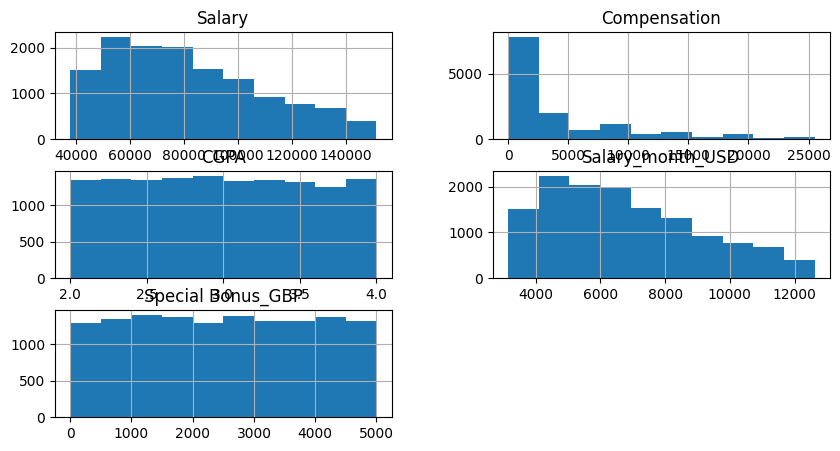

In [ ]:
df_master.hist(figsize=(10,5))

<Axes: >

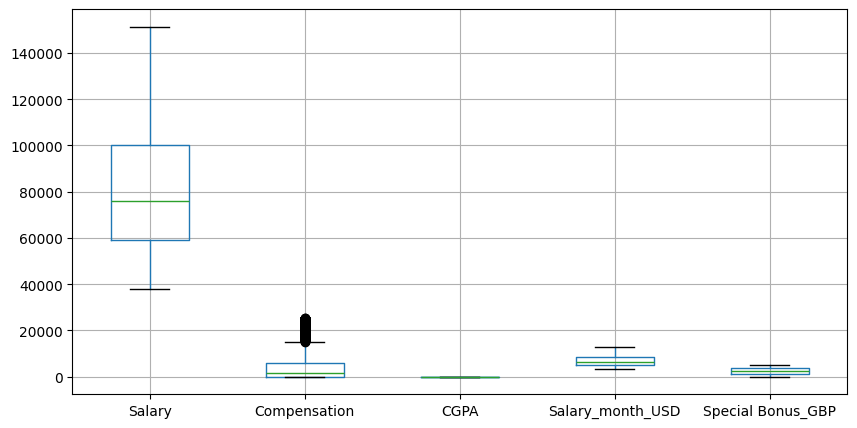

In [ ]:
df_master.boxplot(figsize=(10,5))

<Axes: >

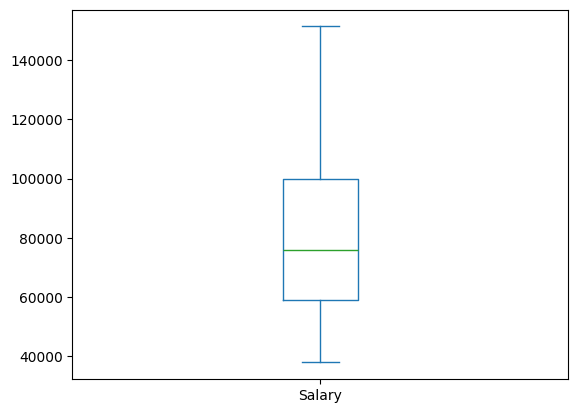

In [ ]:
#df_master['Salary'].hist()
df_master['Salary'].plot(kind='box')

In [ ]:
df_categorical =  df_master.select_dtypes(include=['object'])
df_categorical.head()

,Timestamp,Age,Industry,Job title,Currency,Country,State,City,Overall years of experience,Years of experience in current job,Education level,Gender
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
2,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman
3,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,USD,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman
4,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman


<Axes: xlabel='Industry'>

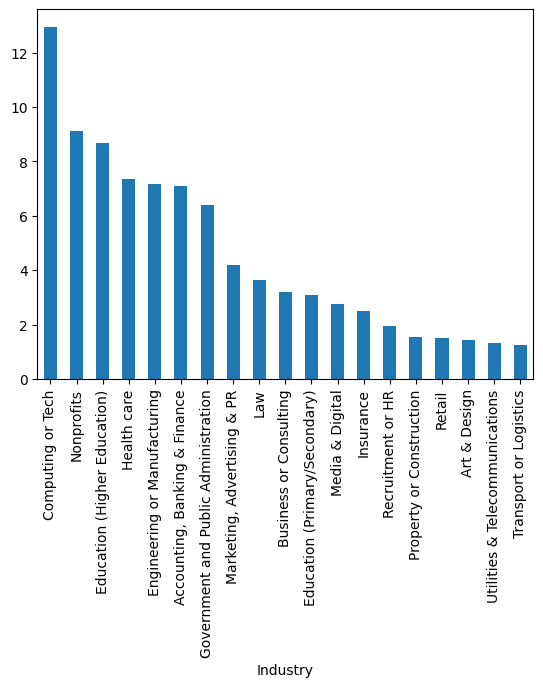

In [ ]:
#df_categorical['Industry'].value_counts().plot(kind='bar')
#df_categorical['Industry'].value_counts().plot(kind='pie')
x = df_categorical['Industry'].value_counts()
#x[x>100].plot(kind='bar')
#print(x.idxmax())
x_df = x.to_frame(name='Count')  # Convert Series to DataFrame with column name 'Count'
x_df['Percentage'] = x_df['Count'] / x_df['Count'].sum() * 100  # Add a new column 'Percentage' to the DataFrame
x_df.head()
#x_df[x_df['Percentage']>1].plot(kind='bar')
#try with this. what happens?
x_df[x_df['Percentage']>1]['Percentage'].plot(kind='bar')

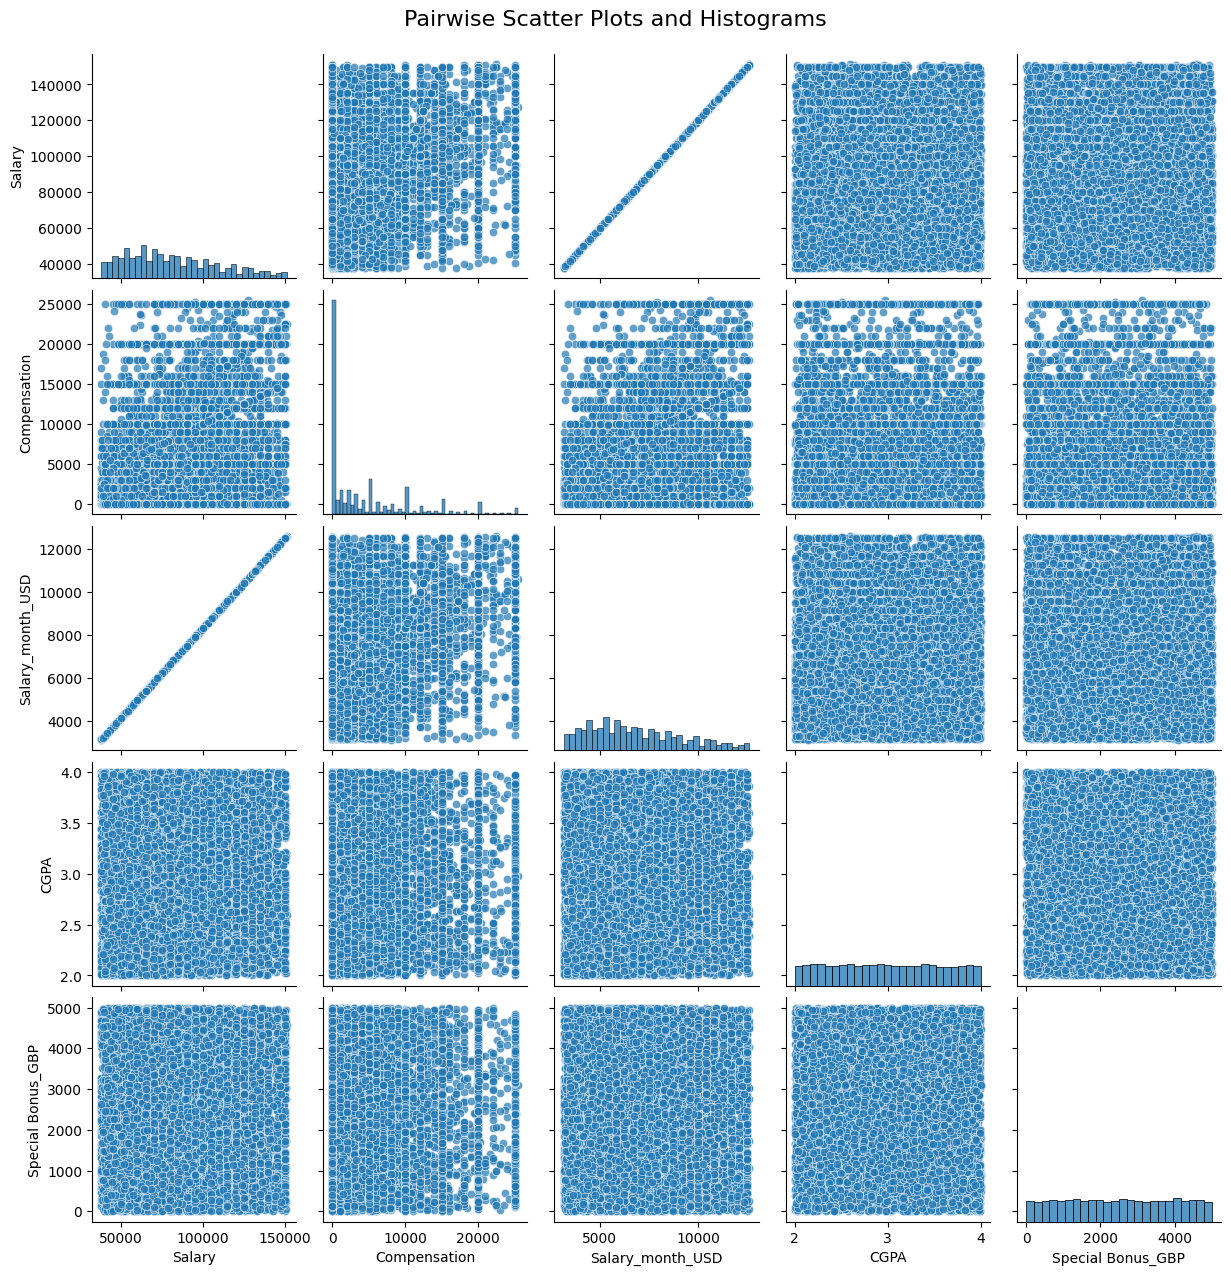

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_numerical, diag_kind="hist", plot_kws={'alpha':0.7})
plt.suptitle("Pairwise Scatter Plots and Histograms", y=1.02, fontsize=16)
plt.show()

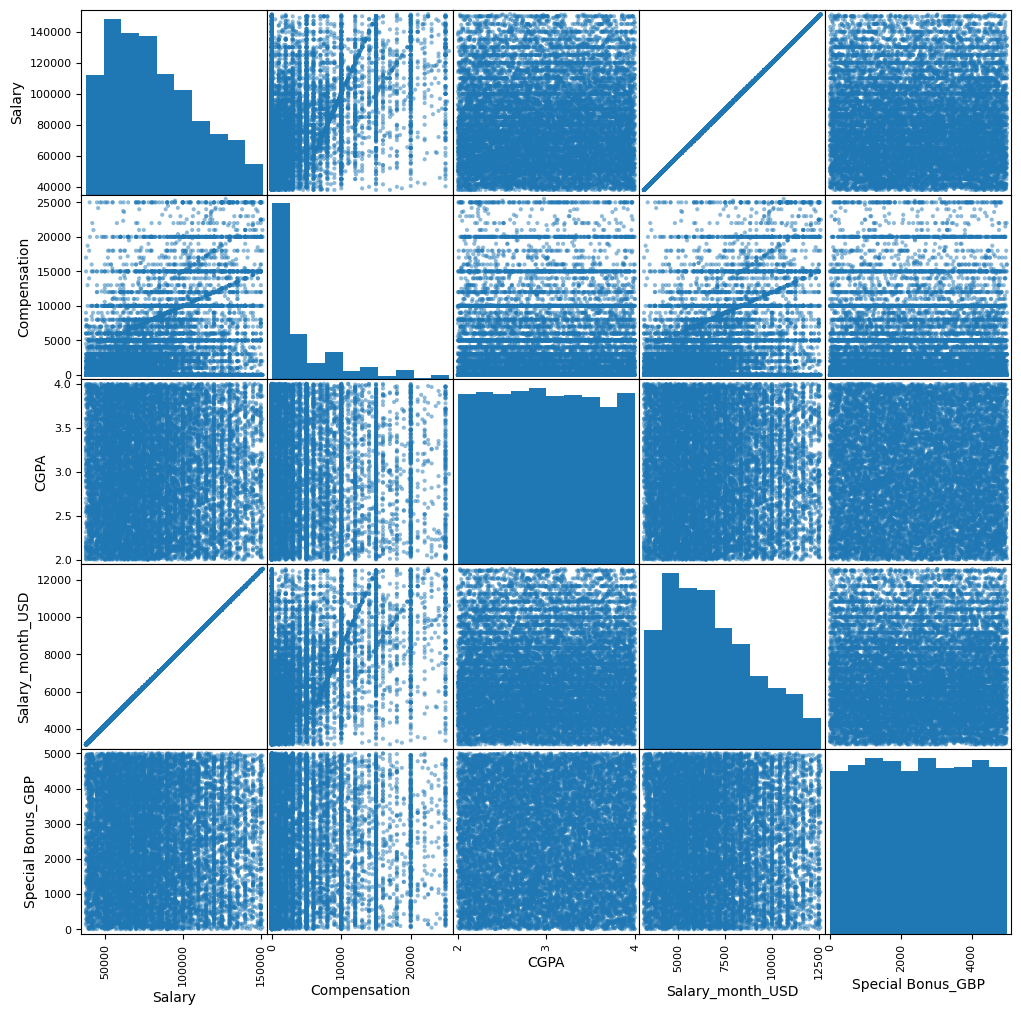

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_master, figsize=(12,12))
plt.show()